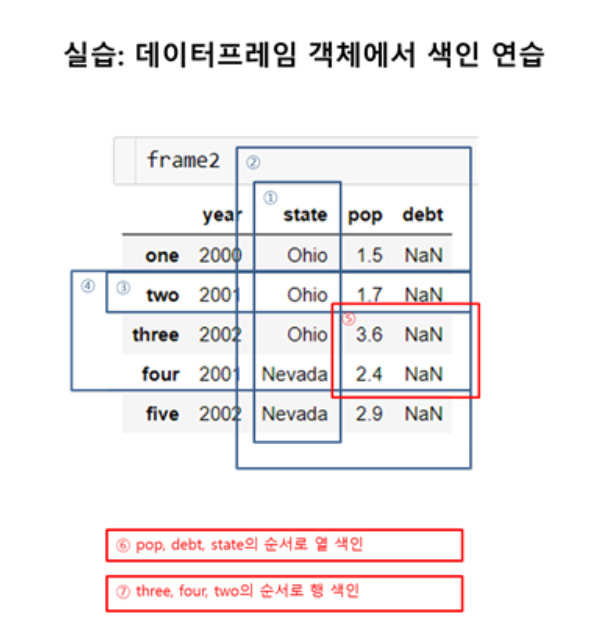

In [1]:
import pandas as pd

In [3]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}


frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four', 'five'])

In [4]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [26]:
frame2['state']

frame2.loc[:,'state': 'debt']

frame2.loc['two']

frame2.loc['two':'four']

frame2.loc['three':'four', 'pop': 'debt']

,pop,debt
three,3.6,NaN
four,2.4,NaN


In [ ]:
frame2.loc[:,['pop','debt', 'state']]

frame2.loc[['three','four', 'two']]

# 6. 함수 적용과 매핑

In [29]:
import numpy as np

In [32]:
frame = pd.DataFrame(np.random.randn(4, 3), columns = list('bde'), index = ['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.855243,0.458257,-0.296135
Ohio,0.023143,1.344455,-1.032499
Texas,-1.228629,-1.129243,-1.187767
Oregon,0.453618,0.321482,0.571414


In [36]:
np.abs(frame)

,b,d,e
Utah,0.855243,0.458257,0.296135
Ohio,0.023143,1.344455,1.032499
Texas,1.228629,1.129243,1.187767
Oregon,0.453618,0.321482,0.571414


In [37]:
np.sum(frame)

b    0.103375
d    0.994951
e   -1.944987
dtype: float64

In [38]:
np.sum(frame, axis=1)

Utah      1.017365
Ohio      0.335098
Texas    -3.545640
Oregon    1.346515
dtype: float64

In [39]:
np.mean(frame)

b    0.025844
d    0.248738
e   -0.486247
dtype: float64

In [ ]:
np.min(frame)

In [42]:
f = lambda  x : x.max() - x.min()

In [43]:
frame.apply(f) # 함수이름 적기

b    2.083873
d    2.473698
e    1.759181
dtype: float64

In [45]:
frame.apply(f, axis='columns') #행 기준으로 열을 묶어서 서로의 최대값에서 최소값 빼기

Utah      1.151378
Ohio      2.376955
Texas     0.099386
Oregon    0.249932
dtype: float64

In [50]:
def f(x):
    return pd.Series([x.min(), x.max()], index =['min', 'max'])

frame.apply(f, axis=0)

,b,d,e
min,-1.228629,-1.129243,-1.187767
max,0.855243,1.344455,0.571414


In [53]:
format = lambda x : '%.2f'%x

In [54]:
map(int, arr)

NameError: name 'arr' is not defined

In [55]:
frame.applymap(format) #데이터 프레임에서는 applymap을 사용

,b,d,e
Utah,0.86,0.46,-0.30
Ohio,0.02,1.34,-1.03
Texas,-1.23,-1.13,-1.19
Oregon,0.45,0.32,0.57


In [56]:
frame['e'].applymap(foramt) #series에서는 map을 사용한다.

Utah     -0.296135
Ohio     -1.032499
Texas    -1.187767
Oregon    0.571414
Name: e, dtype: float64

In [57]:
frame['e'].map(format)

Utah      -0.30
Ohio      -1.03
Texas     -1.19
Oregon     0.57
Name: e, dtype: object

## 실습

* 시리즈 원소에 apply() 적용하기

In [59]:
import seaborn as sns

In [62]:
titanic = sns.load_dataset('titanic')

In [64]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [68]:
df = titanic[['age', 'fare']]
df.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [70]:
def add_10(n):
    return n + 10

In [72]:
type(df['age'])

pandas.core.series.Series

In [73]:
df['age'].apply(add_10)

0      32.0
1      48.0
2      36.0
3      45.0
4      45.0
       ... 
886    37.0
887    29.0
888     NaN
889    36.0
890    42.0
Name: age, Length: 891, dtype: float64

In [74]:
def add_two_obj(a, b):
    return a + b

In [77]:
df['age'].apply(add_two_obj, b=20) #기본적으로 첫번째 argc에는 기본 객체가 들어가고 추가 argc에 대해서는 지정할 수 있다.

0      42.0
1      58.0
2      46.0
3      55.0
4      55.0
       ... 
886    47.0
887    39.0
888     NaN
889    46.0
890    52.0
Name: age, Length: 891, dtype: float64

In [ ]:
f = lambda x : x + 10

df['age'].apply(f)

* 데이터 프레임 원소에 applymap()적용

In [79]:
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age', 'fare']]
df.head

<bound method NDFrame.head of       age     fare
0    22.0   7.2500
1    38.0  71.2833
2    26.0   7.9250
3    35.0  53.1000
4    35.0   8.0500
..    ...      ...
886  27.0  13.0000
887  19.0  30.0000
888   NaN  23.4500
889  26.0  30.0000
890  32.0   7.7500

[891 rows x 2 columns]>

In [82]:
df.apply(f)

,age,fare
0,32.0,17.2500
1,48.0,81.2833
2,36.0,17.9250
3,45.0,63.1000
4,45.0,18.0500
...,...,...
886,37.0,23.0000
887,29.0,40.0000
888,NaN,33.4500
889,36.0,40.0000


In [83]:
f = lambda x : x + [10, 20]

In [86]:
df.apply(f, axis=1)

,age,fare
0,32.0,27.2500
1,48.0,91.2833
2,36.0,27.9250
3,45.0,73.1000
4,45.0,28.0500
...,...,...
886,37.0,33.0000
887,29.0,50.0000
888,NaN,43.4500
889,36.0,50.0000


In [87]:
f = lambda x : x + 10
df.applymap(f)

,age,fare
0,32.0,17.2500
1,48.0,81.2833
2,36.0,17.9250
3,45.0,63.1000
4,45.0,18.0500
...,...,...
886,37.0,23.0000
887,29.0,40.0000
888,NaN,33.4500
889,36.0,40.0000


* 데이터 프레임에 apply적용 (축이 명시,  default는 axis=0)

In [88]:
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age', 'fare']]
df.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [89]:
def missing_value(x):
    return x.isnull()

In [90]:
df.apply(missing_value)

,age,fare
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
886,False,False
887,False,False
888,True,False
889,False,False


In [91]:
# 최대값 - 최소값을 반환하는 함수

In [93]:
f = lambda x : max(x) - min(x)

In [95]:
# df에 위의 함수 적용 (apply사용 0번축)
df.apply(f, axis = 0)

age      79.5800
fare    512.3292
dtype: float64

# 7.정렬과 순위

In [96]:
obj = pd.Series(range(4), index = ['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [98]:
obj.sort_index() #index의 아스키코드 순으로 바뀐다.

a    1
b    2
c    3
d    0
dtype: int64

In [104]:
frame = pd.DataFrame(np.arange(8).reshape(2, 4), 
            index = ['three', 'one'],
            columns = ['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [106]:
frame.sort_index(axis=0) #default값이다.

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [107]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [108]:
frame.sort_index(axis=1, ascending = False) # ascending는 순서 false는 역순이라는 뜻.

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [110]:
obj = pd.Series([4, 7, -3, 2])
obj

0    4
1    7
2   -3
3    2
dtype: int64

In [111]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [113]:
frame = pd.DataFrame({'b' : [4, 7, -3, 2] , 'a' : [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [118]:
frame.sort_values(by = 'a') #by는 우선순위인것이다.

,b,a
0,4,0
2,-3,0
1,7,1
3,2,1


In [119]:
frame.sort_values(by = ['a', 'b']) # 첫번째 값 위주로 순위를 정하는데 동일 값에 대해서는 b로 순서를 정렬한다 우선순위 1순위 2순위라고 생각하자.

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


In [128]:
obj = pd.Series([7, -5 ,7, 4, 2, 0, 4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [129]:
obj.rank(method='first') #.5등 처럼 애매한 것 없애려고 값이 같다면 처음 만난것이 더 순위 높은

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [130]:
obj.rank(ascending=False, method='max') #ascending을 이용한 역순! 
#max는 같은 것이 두개가 오면 해당 순위가 없어지고 뒤로 밀려남 공동 1등은 = 각각 2등 method의 default는 avg라서 평균으로 .5등 같은게 나온다.

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [131]:
dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 'c3':[10,11,12], 'c4':[13,14,15]}

df = pd.DataFrame(dict_data, index=['r0', 'r1', 'r2'])
df

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15


In [132]:
# 내림차 순으로 행 인덱스 정렬

In [135]:
df.sort_index(ascending=False)

,c0,c1,c2,c3,c4
r2,3,6,9,12,15
r1,2,5,8,11,14
r0,1,4,7,10,13


In [133]:
# c1 열을 기준으로 내림차순 정렬

In [143]:
df.sort_values(by ='c1', ascending=False)

,c0,c1,c2,c3,c4
r2,3,6,9,12,15
r1,2,5,8,11,14
r0,1,4,7,10,13


In [145]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c']) #딕셔너리와 같지는 않아서 중복 색인 가능
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [148]:
obj.index.is_unique

False

In [149]:
obj['a']

a    0
a    1
dtype: int64

In [150]:
obj['c']

4

In [151]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,0.200249,-0.383610,1.125898
a,1.080589,0.508122,0.182431
b,0.801311,0.276389,-1.009442
b,0.679310,1.144845,-1.554800


In [152]:
df.loc['b'] #둘다 나온다. 

,0,1,2
b,0.801311,0.276389,-1.009442
b,0.679310,1.144845,-1.554800


# 9. 기술 통계 계산과 요약

In [153]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [155]:
df.sum() #NaN은 자동 무시해서 좋음

one    9.25
two   -5.80
dtype: float64

In [156]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [157]:
#기본적으로 열과 행 연산이든 그런 연산에서 NaN을 무시하지 않았는데. sum은 (한 데이터 프레임에서 계산을 내는 sum) 자동적으로 0으로 변환됐다.

In [161]:
df.sum(axis='columns', skipna=False) #default는 True  skipna의 뜻은 NaN을 무시할 것이냐이다.

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

In [162]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [164]:
df.mean(axis='columns') #C가 안된건 둘다 NaN이라서 그렇다.

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

In [165]:
# numpy : argmax  최대값의 위치
# pandas : idxmax 최대값의 위치

In [166]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [167]:
df.idxmax()

one    b
two    d
dtype: object

In [168]:
df.cumsum() #누적해간다.

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [169]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [170]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [172]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4) 
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [174]:
obj.describe() #데이터 자체가 수가 아니라서 describe의 결과가 줄어든다. top은 많이 있는 것. freq는 반복된 횟수

count     16
unique     3
top        a
freq       8
dtype: object

In [175]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


## 9.1 상관관계와 공분산

In [179]:
# 평균 = x/n 편차 = 요소 - 평균, 편차제곱 = 편차 ^2,  분산  = 편차 제곱 / 5, 

In [182]:
import pandas_datareader.data as web

In [183]:
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})

In [184]:
price.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-07-26,22.576918,129.809174,52.290607,738.419983
2016-07-27,24.043583,129.576981,51.765491,741.770020
2016-07-28,24.368214,129.208633,51.783920,745.909973
2016-07-29,24.337851,128.608139,52.216900,768.789978
2016-08-01,24.767578,129.272690,52.124783,772.880005


In [185]:
price.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2021-07-19,142.449997,137.919998,277.010010,2585.080078
2021-07-20,146.149994,139.970001,279.320007,2622.030029
2021-07-21,145.399994,141.300003,281.399994,2652.010010
2021-07-22,146.800003,140.710007,286.140015,2666.570068
2021-07-23,148.559998,141.339996,289.670013,2756.320068


In [187]:
returns = price.pct_change() #수익률이 pct_change이다. 전날에 비해서 몇퍼센트 상승했는지를 보는 함수 다음날/전날.
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2021-07-19,-0.026914,-0.007055,-0.013321,-0.019656
2021-07-20,0.025974,0.014864,0.008339,0.014294
2021-07-21,-0.005132,0.009502,0.007447,0.011434
2021-07-22,0.009629,-0.004175,0.016844,0.005490
2021-07-23,0.011989,0.004477,0.012337,0.033657


In [188]:
# 두 속성의 관계를 파악할 수 있는 두가지(산점도, 상관계수)

<AxesSubplot:xlabel='MSFT', ylabel='IBM'>

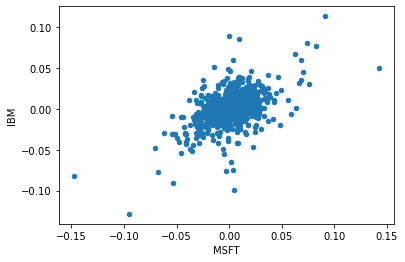

In [191]:
returns.plot(kind='scatter', x='MSFT', y='IBM') #시각화하는데 산점도라는 속성을 부여해서 점으로 나타냄

In [193]:
returns['MSFT'].corr(returns['IBM']) #피어슨 상관계수 default는 피어슨 상관계수다. 서로에 대한 상관계수값을 뽑아낸다. 꽤나 정 비례한다.

0.517781620390907

In [194]:
returns['MSFT'].corr(returns.IBM) #.인덱스값 을 해도 된다.

0.517781620390907

In [195]:
# 전체에 대한 상관계수

returns.corr() #인덱스랑 컬럼은 같다. 자기자신은 무조건 1이다 같으므로. 그리고 대각선 기중으로 대칭이다. a에대한 b랑 b에대한 a의 상관관계는 같기 때문.

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.438657,0.729750,0.658582
IBM,0.438657,1.000000,0.517782,0.483755
MSFT,0.729750,0.517782,1.000000,0.775495
GOOG,0.658582,0.483755,0.775495,1.000000


## 9.2 유일값, 값세기, 멤버십

In [197]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [200]:
obj.unique() #중복을 제거한 값만 나온다.

array(['c', 'a', 'd', 'b'], dtype=object)

In [201]:
obj.value_counts() #중복요소들의 개수를 세준다.

a    3
c    3
b    2
d    1
dtype: int64

In [202]:
pd.value_counts(obj, sort=False) #정렬이 자동 내림차순 이라서 정렬 없이 보고 싶으면 False

a    3
d    1
c    3
b    2
dtype: int64

In [204]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [203]:
obj.isin(['b', 'c']) # b또는 c가 안에 있는지 확인하는 함수

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [205]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [206]:
obj[mask] #이런식으로 불리언 색인도 가능

0    c
5    b
6    b
7    c
8    c
dtype: object

In [208]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])

In [210]:
pd.Index(unique_vals).get_indexer(to_match) #to_match의 값에 포함된 unique_vals의 인덱스를 받아온다.

array([0, 2, 1, 1, 0, 2], dtype=int64)

In [211]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [212]:
data.value_counts()

Qu1  Qu2  Qu3
1    2    1      1
3    2    4      1
     3    5      1
4    1    2      1
     3    4      1
dtype: int64

In [219]:
data['Qu1'].value_counts(sort=False) #해당 컬럼에 대하여 값이 몇 번나왔는지 알려줌.

1    1
3    2
4    2
Name: Qu1, dtype: int64

In [220]:
data['Qu2'].value_counts(sort=False)

1    1
2    2
3    2
Name: Qu2, dtype: int64

In [221]:
data['Qu3'].value_counts(sort=False)

1    1
2    1
4    2
5    1
Name: Qu3, dtype: int64

In [222]:
data.apply(pd.value_counts) # 행(인덱스)는 기존의 01234의 인덱스가 아니라 기존 data안의 요소들로 이루어진 인덱스다.

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [226]:
data.apply(pd.value_counts).fillna(0) #NAN의 값을 ()안의 값으로 채워준다.

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0
